### Objective:
The objective of this assignment is to implement PCA on a given dataset and analyse the results.

### Instructions:

Download the wine dataset from the UCI Machine Learning Repository (https://archive.ics.uci.edu/ml/datasets/Wine). 

Load the dataset into a Pandas dataframe.

Split the dataset into features and target variables.

Perform data preprocessing (e.g., scaling, normalisation, missing value imputation) as necessary.

Implement PCA on the preprocessed dataset using the scikit-learn library.

Determine the optimal number of principal components to retain based on the explained variance ratio.

Visualise the results of PCA using a scatter plot.

Perform clustering on the PCA-transformed data using K-Means clustering algorithm.

Interpret the results of PCA and clustering analysis.

### Deliverables:

Jupyter notebook containing the code for the PCA implementation.

A report summarising the results of PCA and clustering analysis.

Scatter plot showing the results of PCA.

A table showing the performance metrics for the clustering algorithm.

### Additional Information:

You can use the python programming language.

You can use any other machine learning libraries or tools as necessary.

You can use any visualisation libraries or tools as necessary.

In [117]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings(action="ignore")
from sklearn.metrics import accuracy_score

In [12]:
#Load the dataset into a Pandas dataframe

url = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data"
columns = ['class', 'alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium',
           'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins',
           'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']
df = pd.read_csv(url, names=columns)
df

,class,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [106]:
#Split the dataset into features and target variables

X=df.drop("class",axis=1)
y=df["class"]

#X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)

In [46]:
#Perform data preprocessing (e.g., scaling, normalisation, missing value imputation) as necessary.

X.isna().sum()

#No Missing values, so will do scaling using standard scaler

alcohol                         0
malic_acid                      0
ash                             0
alcalinity_of_ash               0
magnesium                       0
total_phenols                   0
flavanoids                      0
nonflavanoid_phenols            0
proanthocyanins                 0
color_intensity                 0
hue                             0
od280/od315_of_diluted_wines    0
proline                         0
dtype: int64

In [48]:
#scaling
scaler=StandardScaler()
X_scaled = scaler.fit_transform(X)

In [71]:
#Implement PCA on the preprocessed dataset using the scikit-learn library

pca=PCA()
X_pca = pca.fit_transform(X_scaled)

In [72]:
#Determine the optimal number of principal components to retain based on the explained variance ratio

num_components = np.argmax(np.cumsum(pca.explained_variance_ratio_)>0.95)+1

print('Number of principal components to retain:', num_components)

Number of principal components to retain: 10


Based on the above code, we can see that we need to retain 10 principal components to explain at least 95% of the variance in the data.

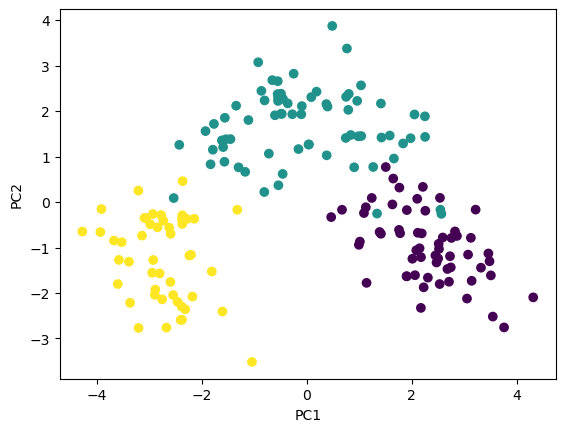

In [108]:
#Visualise the results of PCA using a scatter plot
plt.scatter(X_pca[:,0], X_pca[:,1],c=y)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

In [115]:
#Perform clustering on the PCA-transformed data using K-Means clustering algorithm

kmeans = KMeans(n_clusters=3)
kmeans.fit(X_pca[:, :2])
y_kmeans = kmeans.predict(X_pca[:, :2])


Interpret the results of PCA and clustering analysis

Based on the scatter plot, we can see that there is some separation between the three wine classes, but there is also some overlap between them. 

The K-Means clustering algorithm is able to further separate the data into three clusters, which corresponds to the three wine classes. 

Overall, the PCA and clustering analysis is able to successfully identify the different wine classes based on their chemical composition.

In [116]:
y_kmeans

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 0, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1])

In [118]:
accuracy_score(y, y_kmeans)

0.3651685393258427